<a href="https://colab.research.google.com/github/LeoFernanndes/notebooks/blob/master/CFD_TC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             N          dX                 Tn              Ta-Tn
0          1.0  1.00000000  0.268941421369995  0.074540935880339
1         10.0  0.10000000  0.342649995115140  0.000832362135194
2        100.0  0.01000000  0.343474024014222  0.000008333236112
3       1000.0  0.00100000  0.343482273917011  0.000000083333323
4      10000.0  0.00010000  0.343482356417001  0.000000000833333
5     100000.0  0.00001000  0.343482357242002  0.000000000008332
6    1000000.0  0.00000100  0.343482357250255  0.000000000000079
7   10000000.0  0.00000010  0.343482357250310  0.000000000000024
8  100000000.0  0.00000001  0.343482357250315  0.000000000000019 



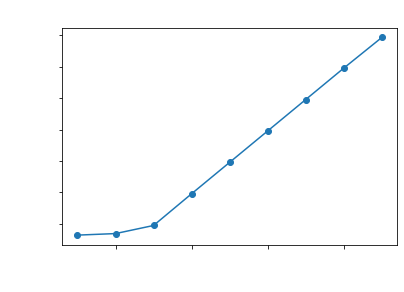

In [26]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# setando numero de algarismos significativos
pd.set_option('precision', 15)

# definição do numero de linhas na tabela
potencia = 8

# definição do numero de pontos por potência de n
n = []
power = np.arange(0, potencia+1)
for i in power:
  n.append(10**i)

# definição de L
L = 1

# criação da estrutura da tabela com 4 colunas preenchidas inicialmente zeros com excessão da primeria
tabela = pd.DataFrame({'N': n,
                       'dX': np.zeros(len(n)),
                       'Tn': np.zeros(len(n)),
                       'Ta-Tn': np.zeros(len(n))})

# definindo e
e = np.exp(1)

# definindo a variável N como float
tabela['N'] = tabela['N'].astype('float')

# definição dos tamanhos de dX por potência de n
for i in range(len(tabela['N'])):
  tabela['dX'][i] = L / tabela['N'][i]

# loop pela potência de 10 no número de pontos
for i in power:
  soma = 0
  
#loop para cada obtenção vo valor da temperatura em cada ponto
  for p in range(1, (10 ** i)+1):
    xp = (p - 0.5) * (L/(10**i))
    Tp = ((e ** (2 * xp)) - 1) / (e ** 2 - 1)
    soma += Tp 
  
# incremento do somatório pra obtenção conjunto de n pontos  
  T_media = L/(10 ** i) * soma
  tabela['Tn'][i] = T_media
  tabela['Ta-Tn'][i] = 0.3434823572503340 - T_media

# eixibindo a tabela de resultados
print(tabela, '\n')

# plotando o gráfico de dX x (Ta-Tn)
plt.plot(tabela['dX'], tabela['Ta-Tn'], '-o')
plt.title('Gráfico de erro vs dX', color= 'white', size= 20, fontweight='bold')
plt.ylabel('Erro', color= 'white', size= 15)
plt.yscale('log')
plt.yticks(color= 'white')
plt.xlabel('Delta X', color= 'white', size= 15)
plt.xscale('log')
plt.xticks(color= 'white')
plt.show()

In [23]:
tabela

,N,dX,Tn,Ta-Tn
0,1.0,1.00000,0.268941421369995,0.074540935880339
1,10.0,0.10000,0.342649995115140,0.000832362135194
2,100.0,0.01000,0.343474024014222,0.000008333236112
3,1000.0,0.00100,0.343482273917011,0.000000083333323
4,10000.0,0.00010,0.343482356417001,0.000000000833333
5,100000.0,0.00001,0.343482357242002,0.000000000008332
